# My First Jupyter NB
## Add a sub heading 
And now some text


In [3]:
# My first code
A=2+2
print(A)


4


In [1]:
a = "this is python"; print(a)

this is python


In [1]:
a<- "this is R!"; cat(a)

this is R!

**My first python graphic**


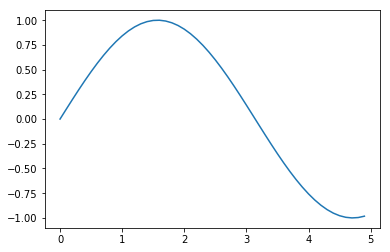

In [1]:
import matplotlib.pyplot as p
import scipy as sc

x = sc.arange(0,5,0.1); y = sc.sin(x)
p.plot(x,y); p.show()

**My first R graphic**

Loading required package: ggplot2


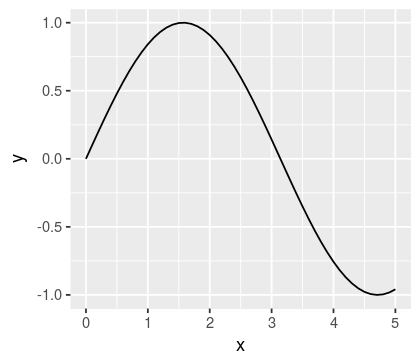

In [1]:
require(ggplot2)
library(repr) # to resize plot within jupyter - this package is part of IRkernal
options(repr.plot.width=3.5,repr.plot.height=3)

x<-seq(0,5,0.1); y<-sin(x)
qplot(x,y,geom ="line") #large figure

In [2]:
%matplotlib inline
from sympy import * # for symbolic analysis
import scipy as sc # for numerical analysis
import matplotlib.pyplot as plt # for plotting
init_printing() # To get nice latex-formatted output

In [3]:
x = var('x')
type(x) # check it's class

sympy.core.symbol.Symbol

In [4]:
a, b, c = var("a,b,c") # Define multiple variables all at once

Can give variables constraints

In [6]:
x= var('x',real=True)
x = var('x', positive=True)
# Checking
x.is_imaginary


In [7]:
x>0


Can define symbolic equations to manipulate

In [20]:
MyFun = (pi + x)**2 ;MyFun

In [10]:
latex(MyFun)

\left(x + \pi\right)^{2}


In [11]:
print(latex(MyFun))

\left(x + \pi\right)^{2}


## Numerical evaluation
Can use the evalf function or N

CAS (computer algebra systems) features are used to produce pen on paper maths style manipulations if expression. Use sympy for this

In [15]:
print(pi.evalf(n=100)) # pi to 100 dp
print(N(pi,50)) # pi to 50 dp
print(N(MyFun,5))

3.141592653589793238462643383279502884197169399375105820974944592307816406286208998628034825342117068
3.1415926535897932384626433832795028841971693993751
(x + 3.1416)**2


In [16]:
# Evaluate it for x = 1.5
N(MyFun.subs(x,1.5))

In [21]:
N(MyFun.subs(x,a+pi))

Assign to a new function and evaluate over a range of values

In [27]:
MyFun_new = MyFun.subs(x,a+pi)
x_vec = sc.arange(0,10,0.1)
MyFun_vec =sc.array([N(((x+pi)**2).subs(x,xx)) for xx in x_vec]) # using a list comprehension

[9.86960440108936 10.5079229318073 11.1662414625253 11.8445599932432
 12.5428785239612 13.2611970546792 13.9995155853971 14.7578341161151
 15.5361526468330 16.3344711775510 17.1527897082689 17.9911082389869
 18.8494267697049 19.7277453004228 20.6260638311408 21.5443823618587
 22.4827008925767 23.4410194232947 24.4193379540126 25.4176564847306
 26.4359750154485 27.4742935461665 28.5326120768845 29.6109306076024
 30.7092491383204 31.8275676690383 32.9658861997563 34.1242047304742
 35.3025232611922 36.5008417919102 37.7191603226281 38.9574788533461
 40.2157973840640 41.4941159147820 42.7924344455000 44.1107529762179
 45.4490715069359 46.8073900376538 48.1857085683718 49.5840270990898
 51.0023456298077 52.4406641605257 53.8989826912436 55.3773012219616
 56.8756197526795 58.3939382833975 59.9322568141154 61.4905753448334
 63.0688938755514 64.6672124062693 66.2855309369873 67.9238494677052
 69.5821679984232 71.2604865291412 72.9588050598591 74.6771235905771
 76.4154421212950 78.1737606520130

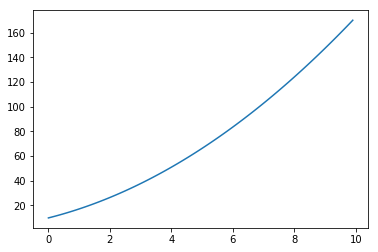

In [30]:
print(MyFun_vec)
fig, ax = plt.subplots()
ax.plot(x_vec, MyFun_vec)

A quicker evaluation method, lamdify

In [33]:
MyFun_lamb = lambdify([x],MyFun, 'numpy') # first arg is python list of variables
# second arg is the function

Measure time difference

In [34]:
%%timeit
MyFun_vec= sc.array([N(((x+pi)**2).subs(x,xx))for xx in x_vec])

21.1 ms ± 383 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [35]:
%%timeit
MyFun_vec=MyFun_lamb(x_vec)

2.72 µs ± 34.5 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


### Algebraic Manipulations
One of the main uses of CAS 

In [36]:
(x+1)*(x+2)*(x+3)

In [37]:
expand((x+1)*(x+2)*(x+3))

Expand trig functions

In [38]:
sin(a+b)

In [39]:
expand(sin(a+b), trig=True)

Factorize too

In [40]:
factor(x**3 + 6*x**2 + 11*x + 6)

## Biological examples
one population exponential growth
Model: $$\label{eq:exp_growth} \frac{\text{d}N}{\text{d}t} = r_m N $$
$r_m$ is the intrinsic, constant rate of population growth (units of 1/time) and $N$ is population size

First set up the variables and define N

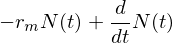

In [43]:
r_m, N, t = var("r_m N t", real = True)
N = Function('N')
dN_dt = Derivative(N(t),t) - r_m*N(t); dN_dt

Note written \ref{eq: exp_growth} as LHS=RHS. Solve usign dsolve

In [42]:
MyEq_sol = dsolve(dN_dt) ; MyEq_sol

Use fixed points to solve constants

# Data manipulation and analysis
## Using Pandas

In [46]:
import pandas as pd
import scipy as sc # also needed for this chapter
pd.__version__

'0.20.3'

In [48]:
# Importing data
MyDF = pd.read_csv('../../Week2/Data/testcsv.csv', sep=',')
MyDF

,Species,Infraorder,Family,Distribution,Body mass male (Kg)
0,Daubentonia_madagascariensis,Chiromyiformes,Daubentoniidae,Madagascar,2.700
1,Allocebus_trichotis,Lemuriformes,Cheirogaleidae,Madagascar,0.100
2,Avahi_laniger,Lemuriformes,Indridae,America,1.030
3,Avahi_occidentalis,Lemuriformes,Indridae,Madagascar,0.814
4,Avahi_unicolor,Lemuriformes,Indridae,America,0.830
5,Cheirogaleus_adipicaudatus,Lemuriformes,Cheirogaleidae,Madagascar,0.200
6,Cheirogaleus_crossleyi,Lemuriformes,Cheirogaleidae,Madagascar,0.400
7,Cheirogaleus_major,Lemuriformes,Cheirogaleidae,Madagascar,0.450
8,Cheirogaleus_medius,Lemuriformes,Cheirogaleidae,Madagascar,0.217


In [50]:
# Creating a dataframe
MyDF= pd.DataFrame({
    'col1': ['Var1', 'Var2', 'Var3', 'Var4'],
    'col2': ['Grass', 'Rabbit', 'Fox', 'Wolf'],
    'col3': [1, 2, sc.nan, 4]
})

MyDF

,col1,col2,col3
0,Var1,Grass,1.0
1,Var2,Rabbit,2.0
2,Var3,Fox,NaN
3,Var4,Wolf,4.0


Explore data

In [60]:
print(MyDF.head())
print(MyDF.tail())
print(MyDF.shape)
print(len(MyDF))
print(MyDF.columns) # Column names
print(MyDF.dtypes) # Columns and types


   col1    col2  col3
0  Var1   Grass   1.0
1  Var2  Rabbit   2.0
2  Var3     Fox   NaN
3  Var4    Wolf   4.0
   col1    col2  col3
0  Var1   Grass   1.0
1  Var2  Rabbit   2.0
2  Var3     Fox   NaN
3  Var4    Wolf   4.0
(4, 3)
4
Index(['col1', 'col2', 'col3'], dtype='object')
col1     object
col2     object
col3    float64
dtype: object


In [59]:
MyDF.values # Converts from to 2D table


array([['Var1', 'Grass', 1.0],
       ['Var2', 'Rabbit', 2.0],
       ['Var3', 'Fox', nan],
       ['Var4', 'Wolf', 4.0]], dtype=object)

In [57]:
MyDF.describe()

,col3
count,3.000000
mean,2.333333
std,1.527525
min,1.000000
25%,1.500000
50%,2.000000
75%,3.000000
max,4.000000
